<a href="https://colab.research.google.com/github/Helenaden/Object-Oriented-Programming-in-Python-for-Data-Science/blob/main/OOP_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Oriented Programming in Python for Data Science

## Implementing a data point class

In [1]:
import os
import cv2
import numpy
import shapely
from shapely import geometry
import json

from google.colab.patches import cv2_imshow

## Starting simple:
- Image
- List of Points
- Labels for each object

Want to represent the mask in the following image format:
https://github.com/wkentaro/labelme/tree/main/examples/instance_segmentation



In [2]:
# Download the example data from the labelme repository
!git clone https://github.com/wkentaro/labelme.git

# Create the destination directory
!mkdir labelme_examples

# Copy the instance segmentation example data to the labelme_examples directory
!cp -r labelme/examples/instance_segmentation/data_annotated/* labelme_examples/

# Remove the cloned repository
!rm -rf labelme

Cloning into 'labelme'...
remote: Enumerating objects: 9726, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 9726 (delta 144), reused 120 (delta 120), pack-reused 9499 (from 3)
Receiving objects: 100% (9726/9726), 48.25 MiB | 34.00 MiB/s, done.
Resolving deltas: 100% (5994/5994), done.


In [3]:
labelme_dir = os.path.join(os.getcwd(), "labelme_examples")

In [8]:
img_fname = '2011_000006.jpg'
json_fname = '2011_000006.json'

In [9]:
with open(os.path.join(labelme_dir, '2011_000006.json'), 'r') as f:
  test_json = json.load(f)

In [12]:
img = cv2.imread(os.path.join(labelme_dir, '2011_000006.jpg'))

In [13]:
img.shape

(375, 500, 3)

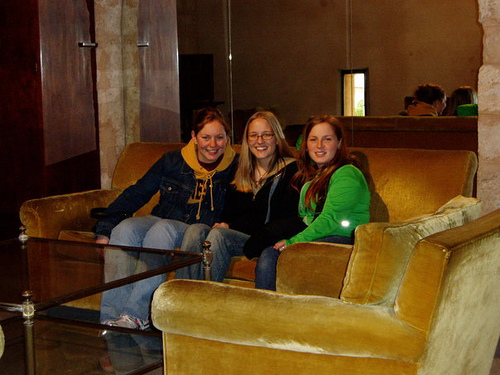

In [14]:
cv2_imshow(img)

## Labelme Format
The labelme format is a pretty common format in computer vision

It comes from the github repo: https://github.com/wkentaro/labelme

For this example, we will use the instance segmentation format to label objects with polygon masks

Lets take a look at the labelme format:

In [15]:
test_json.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [16]:
# view some of the keys here
test_json['imageHeight'], test_json['imageWidth']

(375, 500)

## Labelme polygons

Lets take a look at how the labelme format represents polygons

In [18]:
test_json['shapes'][0]

{'label': 'person',
 'points': [[204.936170212766, 108.56382978723406],
  [183.936170212766, 141.56382978723406],
  [166.936170212766, 150.56382978723406],
  [108.93617021276599, 203.56382978723406],
  [92.93617021276599, 228.56382978723406],
  [95.93617021276599, 244.56382978723406],
  [105.93617021276599, 244.56382978723406],
  [116.93617021276599, 223.56382978723406],
  [163.936170212766, 187.56382978723406],
  [147.936170212766, 212.56382978723406],
  [117.93617021276599, 222.56382978723406],
  [108.93617021276599, 243.56382978723406],
  [100.93617021276599, 325.56382978723406],
  [135.936170212766, 329.56382978723406],
  [148.936170212766, 319.56382978723406],
  [150.936170212766, 295.56382978723406],
  [169.936170212766, 272.56382978723406],
  [171.936170212766, 249.56382978723406],
  [178.936170212766, 246.56382978723406],
  [186.936170212766, 225.56382978723406],
  [214.936170212766, 219.56382978723406],
  [242.936170212766, 157.56382978723406],
  [228.936170212766, 146.5638297

## Lets Visualize the Polygons

Depending on the graphing library or the data representation of a polygon in other libraries, the format can be one of the two following options:

- [(x1, y1), (x2, y2), ..., (xn, yn)]

- [[x1, x2, ..., xn], [y1, y2, ..., yn]]

And sometimes depending on the if the library has an option for closed or open polygons, we may need to enforce that the polygon list starts and ends with the same coord point

- [(x1, y1), (x2, y2), ..., (xn, yn), (x1, y1)]

- [[x1, x2, ..., xn, x1], [y1, y2, ..., yn, yn]]

## Plotting line segments

Brief intro to matplotlib:

Matplotlib is the most common graphing library in Python

Its very useful for creating graphs and other graphical objects

Check out some examples here: https://matplotlib.org/stable/plot_types/index.html

For this demo, we will only need to display an image and overlay a set of points onto the image. We can do that by creating a figure and axes object. The image will be displayed onto the axes, the sets of points will be used to create a polygon object, and the polygon object will be drawn onto the axes. Finally the axes will be shown on the figure



https://matplotlib.org/stable/api/patches_api.html

In [19]:
label = test_json['shapes'][0]['label']
points = test_json['shapes'][0]['points']

In [20]:
label

'person'

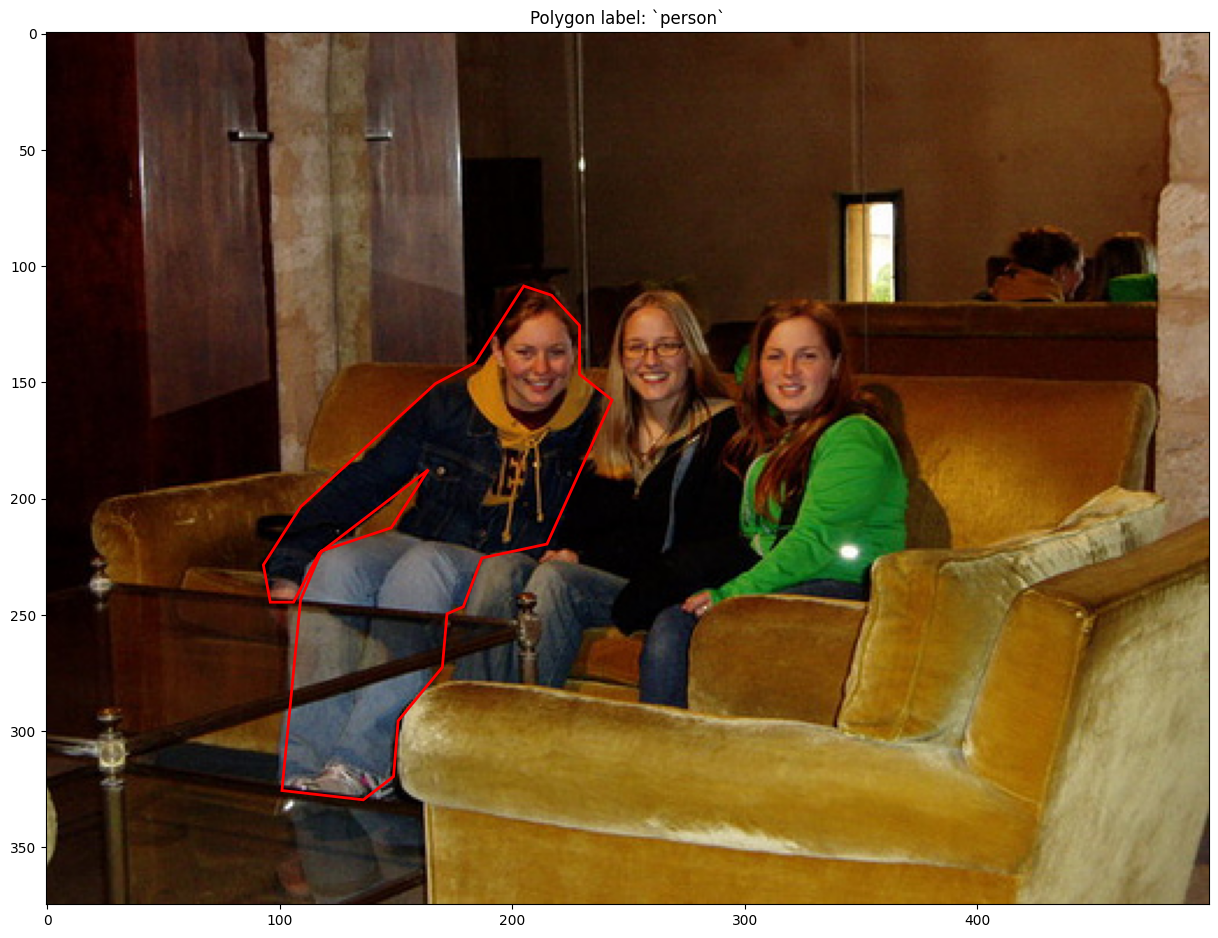

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(os.path.join(labelme_dir, img_fname))

# Create figure and axes
fig, ax = plt.subplots(figsize=(15,15))

# Display the image
ax.imshow(im)

# Create a polygon
poly = patches.Polygon(xy=points, linewidth=2, edgecolor='r', facecolor='none')

# Add the polygon object to the axes
ax.add_patch(poly)

# Add a title
ax.set_title(f"Polygon label: `{label}`")

plt.show()

In [22]:
# python map
# input: shape -> (want to get the label from the shape) -> string for the label

unique_labels = set()
for shape in test_json['shapes']:
  label = shape['label']
  print(label)
  unique_labels.add(label)

person
person
person
chair
person
__ignore__
sofa
sofa
sofa
sofa


In [23]:
unique_labels

{'__ignore__', 'chair', 'person', 'sofa'}

In [24]:
set(map(
    lambda f: f['label'],   # def get_label:    shape['label']
    test_json['shapes']
))

{'__ignore__', 'chair', 'person', 'sofa'}

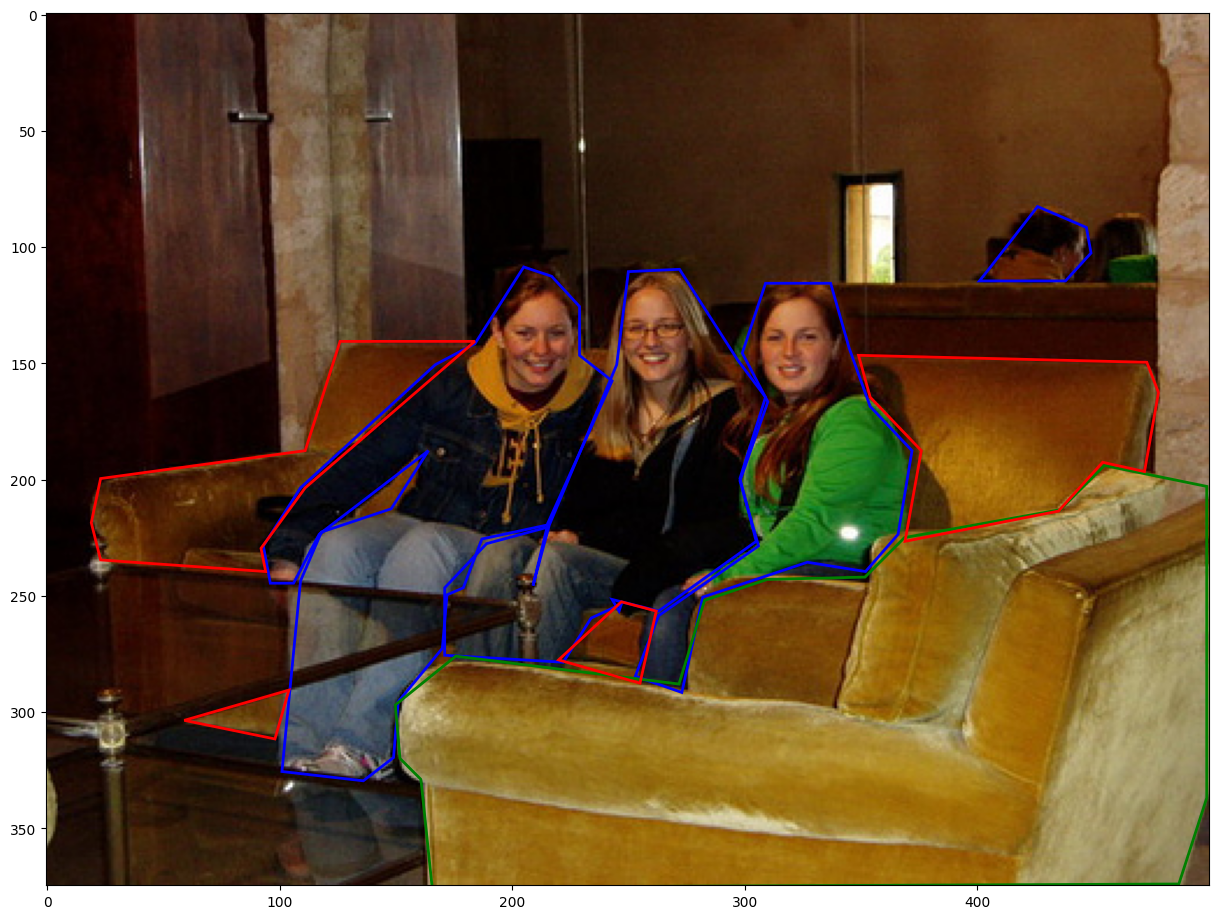

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(os.path.join(labelme_dir, img_fname))

# Create figure and axes
fig, ax = plt.subplots(figsize=(15,15))

# Display the image
ax.imshow(im)

colormap = {
    '__ignore__': 'none',
    'chair': 'g',
    'person': 'b',
    'sofa': 'r'
}

for shape in test_json['shapes']:

  # Create a polygon
  poly = patches.Polygon(
      xy=shape['points'],
      linewidth=2,
      edgecolor=colormap[shape['label']],
      facecolor='none')

  # Add the polygon object to the axes
  ax.add_patch(poly)


plt.show()

fig.savefig(os.path.join(labelme_dir, 'vis.jpeg'))

# Refactor using OOP!

- Creating an image-annotation class
- read the image from disk: provide filenames and main dir
- read the json from disk

In [28]:
# Options for creating class: read image and json now or later?
# How to keep track of images and json?

COLORMAP = {
    '__ignore__': 'none',
    'chair': 'g',
    'person': 'b',
    'sofa': 'r'
}

class ImageData:
  def __init__(self, base_dir_path, file_id, img_ext='jpg'):
    self.base_dir = base_dir_path
    self.file_id = file_id
    self.img_ext=img_ext
    self.img_abs_path = os.path.join(base_dir_path, f"{file_id}.{img_ext}")
    self.json_abs_path = os.path.join(base_dir_path, f"{file_id}.json")
    self.img = None
    self.json = None
    self.labels = None

    try:
      self.img = Image.open(self.img_abs_path)
    except Exception as e:
      print(f"Error reading image: {self.file_id}")

    try:
      self.json = self.load_json()
    except Exception as e:
      print(f"Error reading json: {self.file_id}")

    self.labels = set(map(
      lambda f: f['label'],
      self.json['shapes']
    ))

  def load_json(self):
    json_obj = None
    with open(self.json_abs_path, 'r') as f:
      json_obj = json.load(f)
    return json_obj

  def get_all_labels(self):
    return self.labels

  def display_and_save_vis(self, filepath):
    # self.img

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(15,15))

    # Display the image
    ax.imshow(self.img)

    # COLORMAP


    for shape in self.json['shapes']:

      # Create a polygon
      poly = patches.Polygon(
          xy=shape['points'],
          linewidth=2,
          edgecolor=COLORMAP[shape['label']],
          facecolor='none')

      # Add the polygon object to the axes
      ax.add_patch(poly)


    plt.show()

    fig.savefig(os.path.join(self.labelme_dir, filepath))


In [29]:
test = ImageData(labelme_dir, '2011_000006')
test.get_all_labels()

{'__ignore__', 'chair', 'person', 'sofa'}